In [1]:
# https://www.kaggle.com/code/pasqualebalsebre/a-ml-analysis-of-california-housing-data/notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [2]:
# load dataFrame
data = pd.read_csv("data/housing.csv")
# Convert Categorical Data Values to Features
data = pd.get_dummies(data=data, columns=["ocean_proximity"], prefix="ocean_proximity")
# Fill the NAN value with the intermediate value
data.fillna(data.mean(), inplace=True)

# Independent columns
X = data.iloc[:, data.columns != "median_house_value"]
# target column (median_house_value)
Y = data.iloc[:, 8]

# Since it is impossible to calculate with the original amount of data, only 20% is used to calculate.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, test_size=0.8)

X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6385,-118.06,34.16,46.0,1467.0,298.0,816.0,267.0,3.6705,0,1,0,0,0
7596,-118.25,33.89,35.0,1582.0,391.0,1957.0,404.0,2.4537,1,0,0,0,0
16035,-122.46,37.72,49.0,1207.0,255.0,658.0,220.0,4.0859,0,0,0,0,1
8659,-118.41,33.85,16.0,6123.0,1989.0,2853.0,1789.0,4.4250,0,0,0,0,1
16702,-120.58,35.00,37.0,523.0,119.0,374.0,95.0,1.4726,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,-122.35,37.96,32.0,1991.0,504.0,1139.0,423.0,2.0353,0,0,0,1,0
1603,-122.14,37.88,34.0,6986.0,1096.0,2865.0,1124.0,6.2275,0,0,0,1,0
7659,-118.22,33.84,35.0,1131.0,273.0,1007.0,269.0,4.0219,1,0,0,0,0
20108,-120.35,37.86,25.0,287.0,57.0,118.0,50.0,2.3056,0,1,0,0,0


In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Selection with SelectKBest class to extract top 10 best features
bestFeatures = SelectKBest(score_func=chi2, k=10)
# Negative longitude data is converted to positive data using absolute values.
fit = bestFeatures.fit(X.abs(), Y)

dfColumns = pd.DataFrame(X.columns)
dfScores = pd.DataFrame(fit.scores_)

featureScores = pd.concat([dfColumns, dfScores], axis=1)
featureScores.columns = ["Specs", "Score"]

print(featureScores.nlargest(10,"Score"))

                         Specs         Score
3                  total_rooms  9.772920e+06
5                   population  3.988363e+06
4               total_bedrooms  1.402919e+06
6                   households  1.303777e+06
2           housing_median_age  2.319302e+04
7                median_income  1.171746e+04
9       ocean_proximity_INLAND  6.565265e+03
11    ocean_proximity_NEAR BAY  4.079131e+03
12  ocean_proximity_NEAR OCEAN  3.993245e+03
8    ocean_proximity_<1H OCEAN  3.746993e+03


In [4]:
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
print(model.feature_importances_)

[1.22430262e-01 1.21982255e-01 1.13524690e-01 1.24743369e-01
 1.23041898e-01 1.24880947e-01 1.23055388e-01 1.36580383e-01
 2.80659369e-03 1.91672193e-03 1.23991581e-04 2.10121292e-03
 2.81228764e-03]


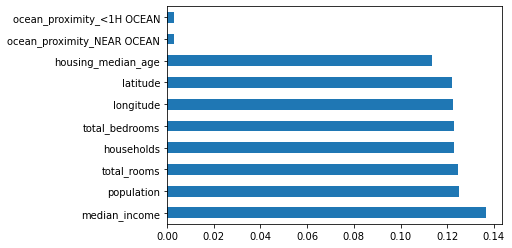

In [5]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()